In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
## Data Merge and Read

#df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./SalesAnalysis/Sales_Data/')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)


In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how = 'all')

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
all_data = all_data[all_data['Order Date'] != 'Order Date']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
### Best month for sale and how much earning?
# month conversion

all_data['Month'] = all_data['Order Date'].str.split('/').str[0]

all_data['Month'] = all_data['Month'].astype('int32')

In [7]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data ['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99
...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles CA,8.97
186845,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco CA,700.00
186846,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco CA,700.00
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco CA,379.99


In [9]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


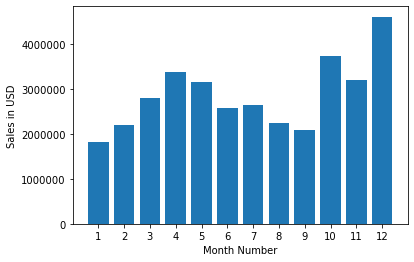

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

In [11]:
### What city have highest sales?

results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


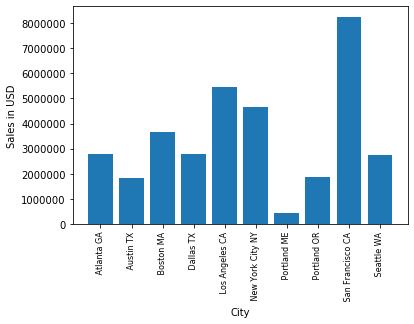

In [12]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation = 'vertical', size = 8 )
plt.ylabel('Sales in USD')
plt.xlabel('City')

plt.show()

In [17]:
### good time for advertisement ?? 

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [21]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,9,27


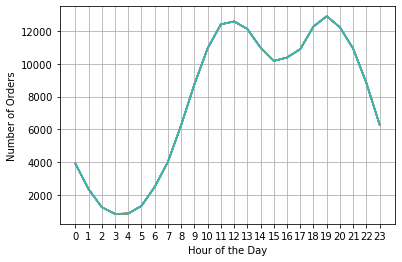

In [31]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")

plt.show()

In [37]:
## Nature of Products Sold Together?

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

c:\users\symon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [39]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
    for key, value in count.most_common(10):
        print(key,value)

('Google Phone', 'Wired Headphones') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('AAA Batteries (4-pack)', 'Google Phone') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('AAA Batteries (4-pack)', 'Google Phone') 1
('Lightning Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('AAA Batteries (4-pack)', 'Google Phone') 1
('Lightning Charging Cable', 'USB-C Charging Cable') 1
('Apple Airpods Headphones', 'ThinkPad Laptop') 1
('Go

('iPhone', 'Wired Headphones') 2
('iPhone', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable') 16
('iPhone', 'Lightning Charging Cable') 15
('Google Phone', 'Wired Headphones') 8
('iPhone', 'Apple Airpods Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable') 3
('Lightning Charging Cable', 'USB-C Charging Cable') 2
('Google Phone', 'Bose SoundSport Headphones') 2
('Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Wired Headphones') 2
('iPhone', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable') 16
('iPhone', 'Lightning Charging Cable') 15
('Google Phone', 'Wired Headphones') 8
('iPhone', 'Apple Airpods Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable') 3
('Lightning Charging Cable', 'USB-C Charging Cable') 2
('Google Phone', 'Bose SoundSport Headphones') 2
('Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Wired Headphones') 2
('iPhone', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable') 16
('

('iPhone', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable') 7
('Google Phone', 'Bose SoundSport Headphones') 5
('AAA Batteries (4-pack)', 'Google Phone') 3
('iPhone', 'AAA Batteries (4-pack)') 3
('Bose SoundSport Headphones', 'AA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable') 28
('iPhone', 'Lightning Charging Cable') 27
('Google Phone', 'Wired Headphones') 11
('iPhone', 'Apple Airpods Headphones') 10
('iPhone', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable') 7
('Google Phone', 'Bose SoundSport Headphones') 5
('AAA Batteries (4-pack)', 'Google Phone') 3
('iPhone', 'AAA Batteries (4-pack)') 3
('Bose SoundSport Headphones', 'AA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable') 28
('iPhone', 'Lightning Charging Cable') 27
('Google Phone', 'Wired Headphones') 11
('iPhone', 'Apple Airpods Headphones') 10
('iPhone', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable') 7
('Google Phone', 'Bose SoundSport Headphones'

('iPhone', 'Apple Airpods Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable') 11
('iPhone', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones') 6
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('Vareebadd Phone', 'Wired Headphones') 5
('Lightning Charging Cable', 'Lightning Charging Cable') 4
('iPhone', 'Lightning Charging Cable') 40
('Google Phone', 'USB-C Charging Cable') 38
('Google Phone', 'Wired Headphones') 16
('iPhone', 'Apple Airpods Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable') 11
('iPhone', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones') 6
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('Vareebadd Phone', 'Wired Headphones') 5
('USB-C Charging Cable', 'Wired Headphones') 4
('iPhone', 'Lightning Charging Cable') 41
('Google Phone', 'USB-C Charging Cable') 38
('Google Phone', 'Wired Headphones') 16
('iPhone', 'Apple Airpods Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable') 11
('iPhone', 'W

('iPhone', 'Apple Airpods Headphones') 19
('iPhone', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable') 14
('Google Phone', 'Bose SoundSport Headphones') 10
('Vareebadd Phone', 'Wired Headphones') 7
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('Apple Airpods Headphones', 'AAA Batteries (4-pack)') 4
('iPhone', 'Lightning Charging Cable') 56
('Google Phone', 'USB-C Charging Cable') 49
('Google Phone', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones') 19
('iPhone', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable') 14
('Google Phone', 'Bose SoundSport Headphones') 10
('Vareebadd Phone', 'Wired Headphones') 7
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('Apple Airpods Headphones', 'AAA Batteries (4-pack)') 4
('iPhone', 'Lightning Charging Cable') 56
('Google Phone', 'USB-C Charging Cable') 49
('Google Phone', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones') 19
('iPhone', 'Wired Headphones') 16
('Vareebadd Phon

('iPhone', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable') 20
('iPhone', 'Apple Airpods Headphones') 19
('Google Phone', 'Bose SoundSport Headphones') 12
('Vareebadd Phone', 'Wired Headphones') 10
('USB-C Charging Cable', 'Wired Headphones') 7
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('iPhone', 'Lightning Charging Cable') 69
('Google Phone', 'USB-C Charging Cable') 68
('Google Phone', 'Wired Headphones') 27
('iPhone', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable') 20
('iPhone', 'Apple Airpods Headphones') 19
('Google Phone', 'Bose SoundSport Headphones') 12
('Vareebadd Phone', 'Wired Headphones') 10
('USB-C Charging Cable', 'Wired Headphones') 7
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('iPhone', 'Lightning Charging Cable') 70
('Google Phone', 'USB-C Charging Cable') 68
('Google Phone', 'Wired Headphones') 27
('iPhone', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable') 20
('iPhone', 'Apple Airpods Hea

('Vareebadd Phone', 'Wired Headphones') 12
('USB-C Charging Cable', 'Wired Headphones') 10
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 7
('iPhone', 'Lightning Charging Cable') 83
('Google Phone', 'USB-C Charging Cable') 76
('Google Phone', 'Wired Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable') 26
('iPhone', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones') 23
('Google Phone', 'Bose SoundSport Headphones') 15
('Vareebadd Phone', 'Wired Headphones') 12
('USB-C Charging Cable', 'Wired Headphones') 10
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 7
('iPhone', 'Lightning Charging Cable') 83
('Google Phone', 'USB-C Charging Cable') 76
('Google Phone', 'Wired Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable') 26
('iPhone', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones') 23
('Google Phone', 'Bose SoundSport Headphones') 15
('Vareebadd Phone', 'Wired Headphones') 12
('USB-C Charging Cable', 'Wired Headphones') 10
('AA Batteries (4

('iPhone', 'Lightning Charging Cable') 94
('Google Phone', 'USB-C Charging Cable') 89
('Google Phone', 'Wired Headphones') 34
('iPhone', 'Wired Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable') 32
('iPhone', 'Apple Airpods Headphones') 29
('Google Phone', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'Wired Headphones') 15
('USB-C Charging Cable', 'Wired Headphones') 10
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 7
('iPhone', 'Lightning Charging Cable') 94
('Google Phone', 'USB-C Charging Cable') 89
('Google Phone', 'Wired Headphones') 34
('iPhone', 'Wired Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable') 32
('iPhone', 'Apple Airpods Headphones') 29
('Google Phone', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'Wired Headphones') 15
('USB-C Charging Cable', 'Wired Headphones') 10
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 7
('iPhone', 'Lightning Charging Cable') 94
('Google Phone', 'USB-C Charging Cable') 90
('Google Phone', 'Wire

('iPhone', 'Wired Headphones') 42
('Google Phone', 'Wired Headphones') 38
('Vareebadd Phone', 'USB-C Charging Cable') 36
('iPhone', 'Apple Airpods Headphones') 33
('Google Phone', 'Bose SoundSport Headphones') 23
('Vareebadd Phone', 'Wired Headphones') 15
('USB-C Charging Cable', 'Wired Headphones') 11
('AA Batteries (4-pack)', 'Lightning Charging Cable') 8
('iPhone', 'Lightning Charging Cable') 103
('Google Phone', 'USB-C Charging Cable') 98
('iPhone', 'Wired Headphones') 42
('Google Phone', 'Wired Headphones') 38
('Vareebadd Phone', 'USB-C Charging Cable') 36
('iPhone', 'Apple Airpods Headphones') 33
('Google Phone', 'Bose SoundSport Headphones') 23
('Vareebadd Phone', 'Wired Headphones') 15
('USB-C Charging Cable', 'Wired Headphones') 12
('AA Batteries (4-pack)', 'Lightning Charging Cable') 8
('iPhone', 'Lightning Charging Cable') 103
('Google Phone', 'USB-C Charging Cable') 99
('iPhone', 'Wired Headphones') 42
('Google Phone', 'Wired Headphones') 39
('Vareebadd Phone', 'USB-C Charg

('Vareebadd Phone', 'USB-C Charging Cable') 39
('Google Phone', 'Bose SoundSport Headphones') 24
('USB-C Charging Cable', 'Wired Headphones') 16
('Vareebadd Phone', 'Wired Headphones') 16
('Bose SoundSport Headphones', 'Wired Headphones') 10
('iPhone', 'Lightning Charging Cable') 117
('Google Phone', 'USB-C Charging Cable') 114
('iPhone', 'Wired Headphones') 46
('Google Phone', 'Wired Headphones') 45
('iPhone', 'Apple Airpods Headphones') 40
('Vareebadd Phone', 'USB-C Charging Cable') 39
('Google Phone', 'Bose SoundSport Headphones') 24
('USB-C Charging Cable', 'Wired Headphones') 16
('Vareebadd Phone', 'Wired Headphones') 16
('Bose SoundSport Headphones', 'Wired Headphones') 10
('iPhone', 'Lightning Charging Cable') 117
('Google Phone', 'USB-C Charging Cable') 114
('iPhone', 'Wired Headphones') 46
('Google Phone', 'Wired Headphones') 45
('iPhone', 'Apple Airpods Headphones') 40
('Vareebadd Phone', 'USB-C Charging Cable') 39
('Google Phone', 'Bose SoundSport Headphones') 24
('USB-C Cha

('Vareebadd Phone', 'USB-C Charging Cable') 45
('Google Phone', 'Bose SoundSport Headphones') 26
('USB-C Charging Cable', 'Wired Headphones') 18
('Vareebadd Phone', 'Wired Headphones') 18
('Vareebadd Phone', 'Bose SoundSport Headphones') 12
('iPhone', 'Lightning Charging Cable') 133
('Google Phone', 'USB-C Charging Cable') 130
('Google Phone', 'Wired Headphones') 50
('iPhone', 'Wired Headphones') 50
('Vareebadd Phone', 'USB-C Charging Cable') 46
('iPhone', 'Apple Airpods Headphones') 45
('Google Phone', 'Bose SoundSport Headphones') 26
('USB-C Charging Cable', 'Wired Headphones') 18
('Vareebadd Phone', 'Wired Headphones') 18
('Vareebadd Phone', 'Bose SoundSport Headphones') 12
('iPhone', 'Lightning Charging Cable') 133
('Google Phone', 'USB-C Charging Cable') 130
('iPhone', 'Wired Headphones') 51
('Google Phone', 'Wired Headphones') 50
('Vareebadd Phone', 'USB-C Charging Cable') 46
('iPhone', 'Apple Airpods Headphones') 45
('Google Phone', 'Bose SoundSport Headphones') 26
('USB-C Charg

('iPhone', 'Lightning Charging Cable') 139
('iPhone', 'Wired Headphones') 57
('Google Phone', 'Wired Headphones') 51
('iPhone', 'Apple Airpods Headphones') 51
('Vareebadd Phone', 'USB-C Charging Cable') 48
('Google Phone', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'Wired Headphones') 19
('USB-C Charging Cable', 'Wired Headphones') 18
('Vareebadd Phone', 'Bose SoundSport Headphones') 13
('Google Phone', 'USB-C Charging Cable') 147
('iPhone', 'Lightning Charging Cable') 139
('iPhone', 'Wired Headphones') 57
('Google Phone', 'Wired Headphones') 51
('iPhone', 'Apple Airpods Headphones') 51
('Vareebadd Phone', 'USB-C Charging Cable') 48
('Google Phone', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'Wired Headphones') 19
('USB-C Charging Cable', 'Wired Headphones') 18
('Vareebadd Phone', 'Bose SoundSport Headphones') 13
('Google Phone', 'USB-C Charging Cable') 147
('iPhone', 'Lightning Charging Cable') 139
('iPhone', 'Wired Headphones') 57
('Google Phone', 'Wired Headphone

('USB-C Charging Cable', 'Wired Headphones') 21
('Vareebadd Phone', 'Wired Headphones') 21
('Vareebadd Phone', 'Bose SoundSport Headphones') 16
('Google Phone', 'USB-C Charging Cable') 158
('iPhone', 'Lightning Charging Cable') 154
('iPhone', 'Wired Headphones') 61
('Google Phone', 'Wired Headphones') 57
('iPhone', 'Apple Airpods Headphones') 54
('Vareebadd Phone', 'USB-C Charging Cable') 54
('Google Phone', 'Bose SoundSport Headphones') 31
('USB-C Charging Cable', 'Wired Headphones') 21
('Vareebadd Phone', 'Wired Headphones') 21
('Vareebadd Phone', 'Bose SoundSport Headphones') 16
('Google Phone', 'USB-C Charging Cable') 158
('iPhone', 'Lightning Charging Cable') 154
('iPhone', 'Wired Headphones') 61
('Google Phone', 'Wired Headphones') 57
('iPhone', 'Apple Airpods Headphones') 54
('Vareebadd Phone', 'USB-C Charging Cable') 54
('Google Phone', 'Bose SoundSport Headphones') 31
('USB-C Charging Cable', 'Wired Headphones') 21
('Vareebadd Phone', 'Wired Headphones') 21
('Vareebadd Phone',

('Google Phone', 'USB-C Charging Cable') 163
('iPhone', 'Wired Headphones') 65
('Google Phone', 'Wired Headphones') 62
('iPhone', 'Apple Airpods Headphones') 60
('Vareebadd Phone', 'USB-C Charging Cable') 58
('Google Phone', 'Bose SoundSport Headphones') 35
('USB-C Charging Cable', 'Wired Headphones') 22
('Vareebadd Phone', 'Wired Headphones') 22
('Vareebadd Phone', 'Bose SoundSport Headphones') 16
('iPhone', 'Lightning Charging Cable') 169
('Google Phone', 'USB-C Charging Cable') 163
('iPhone', 'Wired Headphones') 65
('Google Phone', 'Wired Headphones') 62
('iPhone', 'Apple Airpods Headphones') 60
('Vareebadd Phone', 'USB-C Charging Cable') 58
('Google Phone', 'Bose SoundSport Headphones') 35
('USB-C Charging Cable', 'Wired Headphones') 23
('Vareebadd Phone', 'Wired Headphones') 22
('Vareebadd Phone', 'Bose SoundSport Headphones') 16
('iPhone', 'Lightning Charging Cable') 169
('Google Phone', 'USB-C Charging Cable') 163
('iPhone', 'Wired Headphones') 65
('Google Phone', 'Wired Headpho

('iPhone', 'Lightning Charging Cable') 176
('iPhone', 'Wired Headphones') 72
('Google Phone', 'Wired Headphones') 70
('iPhone', 'Apple Airpods Headphones') 67
('Vareebadd Phone', 'USB-C Charging Cable') 63
('Google Phone', 'Bose SoundSport Headphones') 37
('USB-C Charging Cable', 'Wired Headphones') 26
('Vareebadd Phone', 'Wired Headphones') 23
('Vareebadd Phone', 'Bose SoundSport Headphones') 18
('Google Phone', 'USB-C Charging Cable') 179
('iPhone', 'Lightning Charging Cable') 177
('iPhone', 'Wired Headphones') 72
('Google Phone', 'Wired Headphones') 70
('iPhone', 'Apple Airpods Headphones') 67
('Vareebadd Phone', 'USB-C Charging Cable') 63
('Google Phone', 'Bose SoundSport Headphones') 37
('USB-C Charging Cable', 'Wired Headphones') 26
('Vareebadd Phone', 'Wired Headphones') 23
('Vareebadd Phone', 'Bose SoundSport Headphones') 18
('Google Phone', 'USB-C Charging Cable') 179
('iPhone', 'Lightning Charging Cable') 177
('iPhone', 'Wired Headphones') 72
('Google Phone', 'Wired Headphone

('iPhone', 'Lightning Charging Cable') 195
('Google Phone', 'USB-C Charging Cable') 192
('iPhone', 'Wired Headphones') 80
('Google Phone', 'Wired Headphones') 76
('iPhone', 'Apple Airpods Headphones') 74
('Vareebadd Phone', 'USB-C Charging Cable') 69
('Google Phone', 'Bose SoundSport Headphones') 39
('USB-C Charging Cable', 'Wired Headphones') 27
('Vareebadd Phone', 'Wired Headphones') 24
('Vareebadd Phone', 'Bose SoundSport Headphones') 20
('iPhone', 'Lightning Charging Cable') 195
('Google Phone', 'USB-C Charging Cable') 193
('iPhone', 'Wired Headphones') 80
('Google Phone', 'Wired Headphones') 76
('iPhone', 'Apple Airpods Headphones') 74
('Vareebadd Phone', 'USB-C Charging Cable') 69
('Google Phone', 'Bose SoundSport Headphones') 39
('USB-C Charging Cable', 'Wired Headphones') 27
('Vareebadd Phone', 'Wired Headphones') 24
('Vareebadd Phone', 'Bose SoundSport Headphones') 20
('iPhone', 'Lightning Charging Cable') 195
('Google Phone', 'USB-C Charging Cable') 193
('iPhone', 'Wired Head

('Vareebadd Phone', 'USB-C Charging Cable') 76
('Google Phone', 'Bose SoundSport Headphones') 44
('USB-C Charging Cable', 'Wired Headphones') 29
('Vareebadd Phone', 'Wired Headphones') 27
('Vareebadd Phone', 'Bose SoundSport Headphones') 22
('Google Phone', 'USB-C Charging Cable') 205
('iPhone', 'Lightning Charging Cable') 203
('iPhone', 'Wired Headphones') 85
('Google Phone', 'Wired Headphones') 81
('iPhone', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'USB-C Charging Cable') 76
('Google Phone', 'Bose SoundSport Headphones') 44
('USB-C Charging Cable', 'Wired Headphones') 29
('Vareebadd Phone', 'Wired Headphones') 27
('Vareebadd Phone', 'Bose SoundSport Headphones') 22
('Google Phone', 'USB-C Charging Cable') 205
('iPhone', 'Lightning Charging Cable') 203
('iPhone', 'Wired Headphones') 85
('Google Phone', 'Wired Headphones') 81
('iPhone', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'USB-C Charging Cable') 76
('Google Phone', 'Bose SoundSport Headphones') 44
('USB-C Charg

('iPhone', 'Apple Airpods Headphones') 82
('Vareebadd Phone', 'USB-C Charging Cable') 78
('Google Phone', 'Bose SoundSport Headphones') 46
('USB-C Charging Cable', 'Wired Headphones') 34
('Vareebadd Phone', 'Wired Headphones') 30
('Vareebadd Phone', 'Bose SoundSport Headphones') 22
('Google Phone', 'USB-C Charging Cable') 217
('iPhone', 'Lightning Charging Cable') 216
('iPhone', 'Wired Headphones') 92
('Google Phone', 'Wired Headphones') 87
('iPhone', 'Apple Airpods Headphones') 82
('Vareebadd Phone', 'USB-C Charging Cable') 78
('Google Phone', 'Bose SoundSport Headphones') 46
('USB-C Charging Cable', 'Wired Headphones') 34
('Vareebadd Phone', 'Wired Headphones') 30
('Vareebadd Phone', 'Bose SoundSport Headphones') 22
('Google Phone', 'USB-C Charging Cable') 217
('iPhone', 'Lightning Charging Cable') 216
('iPhone', 'Wired Headphones') 92
('Google Phone', 'Wired Headphones') 87
('iPhone', 'Apple Airpods Headphones') 82
('Vareebadd Phone', 'USB-C Charging Cable') 78
('Google Phone', 'Bos

('Google Phone', 'USB-C Charging Cable') 229
('iPhone', 'Lightning Charging Cable') 226
('iPhone', 'Wired Headphones') 100
('Google Phone', 'Wired Headphones') 92
('iPhone', 'Apple Airpods Headphones') 84
('Vareebadd Phone', 'USB-C Charging Cable') 81
('Google Phone', 'Bose SoundSport Headphones') 48
('USB-C Charging Cable', 'Wired Headphones') 35
('Vareebadd Phone', 'Wired Headphones') 31
('Vareebadd Phone', 'Bose SoundSport Headphones') 22
('Google Phone', 'USB-C Charging Cable') 229
('iPhone', 'Lightning Charging Cable') 226
('iPhone', 'Wired Headphones') 100
('Google Phone', 'Wired Headphones') 92
('iPhone', 'Apple Airpods Headphones') 84
('Vareebadd Phone', 'USB-C Charging Cable') 81
('Google Phone', 'Bose SoundSport Headphones') 48
('USB-C Charging Cable', 'Wired Headphones') 35
('Vareebadd Phone', 'Wired Headphones') 31
('Vareebadd Phone', 'Bose SoundSport Headphones') 22
('Google Phone', 'USB-C Charging Cable') 229
('iPhone', 'Lightning Charging Cable') 227
('iPhone', 'Wired He

('iPhone', 'Wired Headphones') 104
('Google Phone', 'Wired Headphones') 95
('iPhone', 'Apple Airpods Headphones') 88
('Vareebadd Phone', 'USB-C Charging Cable') 83
('Google Phone', 'Bose SoundSport Headphones') 48
('USB-C Charging Cable', 'Wired Headphones') 38
('Vareebadd Phone', 'Wired Headphones') 35
('Vareebadd Phone', 'Bose SoundSport Headphones') 23
('iPhone', 'Lightning Charging Cable') 239
('Google Phone', 'USB-C Charging Cable') 238
('iPhone', 'Wired Headphones') 105
('Google Phone', 'Wired Headphones') 95
('iPhone', 'Apple Airpods Headphones') 89
('Vareebadd Phone', 'USB-C Charging Cable') 83
('Google Phone', 'Bose SoundSport Headphones') 48
('USB-C Charging Cable', 'Wired Headphones') 38
('Vareebadd Phone', 'Wired Headphones') 35
('Vareebadd Phone', 'Bose SoundSport Headphones') 23
('iPhone', 'Lightning Charging Cable') 239
('Google Phone', 'USB-C Charging Cable') 238
('iPhone', 'Wired Headphones') 105
('Google Phone', 'Wired Headphones') 95
('iPhone', 'Apple Airpods Headpho

('Vareebadd Phone', 'Bose SoundSport Headphones') 23
('Google Phone', 'USB-C Charging Cable') 250
('iPhone', 'Lightning Charging Cable') 247
('iPhone', 'Wired Headphones') 112
('Google Phone', 'Wired Headphones') 98
('iPhone', 'Apple Airpods Headphones') 94
('Vareebadd Phone', 'USB-C Charging Cable') 87
('Google Phone', 'Bose SoundSport Headphones') 51
('USB-C Charging Cable', 'Wired Headphones') 40
('Vareebadd Phone', 'Wired Headphones') 37
('Vareebadd Phone', 'Bose SoundSport Headphones') 23
('Google Phone', 'USB-C Charging Cable') 250
('iPhone', 'Lightning Charging Cable') 247
('iPhone', 'Wired Headphones') 112
('Google Phone', 'Wired Headphones') 98
('iPhone', 'Apple Airpods Headphones') 94
('Vareebadd Phone', 'USB-C Charging Cable') 87
('Google Phone', 'Bose SoundSport Headphones') 51
('USB-C Charging Cable', 'Wired Headphones') 40
('Vareebadd Phone', 'Wired Headphones') 37
('Vareebadd Phone', 'Bose SoundSport Headphones') 23
('Google Phone', 'USB-C Charging Cable') 250
('iPhone',

('iPhone', 'Lightning Charging Cable') 261
('Google Phone', 'USB-C Charging Cable') 259
('iPhone', 'Wired Headphones') 116
('Google Phone', 'Wired Headphones') 106
('iPhone', 'Apple Airpods Headphones') 99
('Vareebadd Phone', 'USB-C Charging Cable') 95
('Google Phone', 'Bose SoundSport Headphones') 53
('USB-C Charging Cable', 'Wired Headphones') 44
('Vareebadd Phone', 'Wired Headphones') 38
('Vareebadd Phone', 'Bose SoundSport Headphones') 24
('iPhone', 'Lightning Charging Cable') 261
('Google Phone', 'USB-C Charging Cable') 259
('iPhone', 'Wired Headphones') 116
('Google Phone', 'Wired Headphones') 106
('iPhone', 'Apple Airpods Headphones') 99
('Vareebadd Phone', 'USB-C Charging Cable') 95
('Google Phone', 'Bose SoundSport Headphones') 53
('USB-C Charging Cable', 'Wired Headphones') 44
('Vareebadd Phone', 'Wired Headphones') 38
('Vareebadd Phone', 'Bose SoundSport Headphones') 24
('iPhone', 'Lightning Charging Cable') 261
('Google Phone', 'USB-C Charging Cable') 259
('iPhone', 'Wired 

('Google Phone', 'USB-C Charging Cable') 271
('iPhone', 'Lightning Charging Cable') 268
('iPhone', 'Wired Headphones') 119
('Google Phone', 'Wired Headphones') 114
('iPhone', 'Apple Airpods Headphones') 106
('Vareebadd Phone', 'USB-C Charging Cable') 102
('Google Phone', 'Bose SoundSport Headphones') 58
('USB-C Charging Cable', 'Wired Headphones') 46
('Vareebadd Phone', 'Wired Headphones') 39
('Vareebadd Phone', 'Bose SoundSport Headphones') 25
('Google Phone', 'USB-C Charging Cable') 271
('iPhone', 'Lightning Charging Cable') 268
('iPhone', 'Wired Headphones') 120
('Google Phone', 'Wired Headphones') 114
('iPhone', 'Apple Airpods Headphones') 106
('Vareebadd Phone', 'USB-C Charging Cable') 102
('Google Phone', 'Bose SoundSport Headphones') 58
('USB-C Charging Cable', 'Wired Headphones') 46
('Vareebadd Phone', 'Wired Headphones') 39
('Vareebadd Phone', 'Bose SoundSport Headphones') 25
('Google Phone', 'USB-C Charging Cable') 271
('iPhone', 'Lightning Charging Cable') 268
('iPhone', 'Wi

('Vareebadd Phone', 'USB-C Charging Cable') 108
('Google Phone', 'Bose SoundSport Headphones') 62
('USB-C Charging Cable', 'Wired Headphones') 48
('Vareebadd Phone', 'Wired Headphones') 43
('Vareebadd Phone', 'Bose SoundSport Headphones') 25
('Google Phone', 'USB-C Charging Cable') 282
('iPhone', 'Lightning Charging Cable') 280
('iPhone', 'Wired Headphones') 127
('Google Phone', 'Wired Headphones') 116
('iPhone', 'Apple Airpods Headphones') 114
('Vareebadd Phone', 'USB-C Charging Cable') 108
('Google Phone', 'Bose SoundSport Headphones') 62
('USB-C Charging Cable', 'Wired Headphones') 48
('Vareebadd Phone', 'Wired Headphones') 43
('Vareebadd Phone', 'Bose SoundSport Headphones') 25
('Google Phone', 'USB-C Charging Cable') 282
('iPhone', 'Lightning Charging Cable') 280
('iPhone', 'Wired Headphones') 127
('Google Phone', 'Wired Headphones') 116
('iPhone', 'Apple Airpods Headphones') 114
('Vareebadd Phone', 'USB-C Charging Cable') 108
('Google Phone', 'Bose SoundSport Headphones') 62
('US

('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd Phone', 'Bose SoundSport Headphones') 27
('Google Phone', 'USB-C Charging Cable') 291
('iPhone', 'Lightning Charging Cable') 291
('iPhone', 'Wired Headphones') 136
('Google Phone', 'Wired Headphones') 123
('iPhone', 'Apple Airpods Headphones') 117
('Vareebadd Phone', 'USB-C Charging Cable') 112
('Google Phone', 'Bose SoundSport Headphones') 63
('USB-C Charging Cable', 'Wired Headphones') 49
('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd Phone', 'Bose SoundSport Headphones') 27
('Google Phone', 'USB-C Charging Cable') 291
('iPhone', 'Lightning Charging Cable') 291
('iPhone', 'Wired Headphones') 137
('Google Phone', 'Wired Headphones') 123
('iPhone', 'Apple Airpods Headphones') 117
('Vareebadd Phone', 'USB-C Charging Cable') 112
('Google Phone', 'Bose SoundSport Headphones') 63
('USB-C Charging Cable', 'Wired Headphones') 49
('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd Phone', 'Bose SoundSport Headphones') 27
('Goog

('USB-C Charging Cable', 'Wired Headphones') 49
('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd Phone', 'Bose SoundSport Headphones') 29
('Google Phone', 'USB-C Charging Cable') 305
('iPhone', 'Lightning Charging Cable') 300
('iPhone', 'Wired Headphones') 143
('Google Phone', 'Wired Headphones') 127
('iPhone', 'Apple Airpods Headphones') 124
('Vareebadd Phone', 'USB-C Charging Cable') 114
('Google Phone', 'Bose SoundSport Headphones') 68
('USB-C Charging Cable', 'Wired Headphones') 49
('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd Phone', 'Bose SoundSport Headphones') 29
('Google Phone', 'USB-C Charging Cable') 305
('iPhone', 'Lightning Charging Cable') 300
('iPhone', 'Wired Headphones') 143
('Google Phone', 'Wired Headphones') 127
('iPhone', 'Apple Airpods Headphones') 124
('Vareebadd Phone', 'USB-C Charging Cable') 114
('Google Phone', 'Bose SoundSport Headphones') 68
('USB-C Charging Cable', 'Wired Headphones') 49
('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd

('Vareebadd Phone', 'Wired Headphones') 47
('Vareebadd Phone', 'Bose SoundSport Headphones') 29
('Google Phone', 'USB-C Charging Cable') 322
('iPhone', 'Lightning Charging Cable') 312
('iPhone', 'Wired Headphones') 149
('Google Phone', 'Wired Headphones') 138
('iPhone', 'Apple Airpods Headphones') 127
('Vareebadd Phone', 'USB-C Charging Cable') 120
('Google Phone', 'Bose SoundSport Headphones') 74
('USB-C Charging Cable', 'Wired Headphones') 52
('Vareebadd Phone', 'Wired Headphones') 47
('Vareebadd Phone', 'Bose SoundSport Headphones') 29
('Google Phone', 'USB-C Charging Cable') 322
('iPhone', 'Lightning Charging Cable') 312
('iPhone', 'Wired Headphones') 149
('Google Phone', 'Wired Headphones') 138
('iPhone', 'Apple Airpods Headphones') 127
('Vareebadd Phone', 'USB-C Charging Cable') 120
('Google Phone', 'Bose SoundSport Headphones') 74
('USB-C Charging Cable', 'Wired Headphones') 52
('Vareebadd Phone', 'Wired Headphones') 47
('Vareebadd Phone', 'Bose SoundSport Headphones') 30
('Goog

('Vareebadd Phone', 'USB-C Charging Cable') 126
('Google Phone', 'Bose SoundSport Headphones') 77
('USB-C Charging Cable', 'Wired Headphones') 54
('Vareebadd Phone', 'Wired Headphones') 52
('Vareebadd Phone', 'Bose SoundSport Headphones') 30
('Google Phone', 'USB-C Charging Cable') 337
('iPhone', 'Lightning Charging Cable') 320
('iPhone', 'Wired Headphones') 154
('Google Phone', 'Wired Headphones') 142
('iPhone', 'Apple Airpods Headphones') 135
('Vareebadd Phone', 'USB-C Charging Cable') 127
('Google Phone', 'Bose SoundSport Headphones') 77
('USB-C Charging Cable', 'Wired Headphones') 54
('Vareebadd Phone', 'Wired Headphones') 52
('Vareebadd Phone', 'Bose SoundSport Headphones') 30
('Google Phone', 'USB-C Charging Cable') 337
('iPhone', 'Lightning Charging Cable') 320
('iPhone', 'Wired Headphones') 154
('Google Phone', 'Wired Headphones') 142
('iPhone', 'Apple Airpods Headphones') 135
('Vareebadd Phone', 'USB-C Charging Cable') 127
('Google Phone', 'Bose SoundSport Headphones') 77
('US

('Vareebadd Phone', 'USB-C Charging Cable') 131
('Google Phone', 'Bose SoundSport Headphones') 78
('USB-C Charging Cable', 'Wired Headphones') 56
('Vareebadd Phone', 'Wired Headphones') 56
('Vareebadd Phone', 'Bose SoundSport Headphones') 30
('Google Phone', 'USB-C Charging Cable') 356
('iPhone', 'Lightning Charging Cable') 330
('iPhone', 'Wired Headphones') 161
('Google Phone', 'Wired Headphones') 147
('iPhone', 'Apple Airpods Headphones') 137
('Vareebadd Phone', 'USB-C Charging Cable') 131
('Google Phone', 'Bose SoundSport Headphones') 78
('USB-C Charging Cable', 'Wired Headphones') 56
('Vareebadd Phone', 'Wired Headphones') 56
('Vareebadd Phone', 'Bose SoundSport Headphones') 30
('Google Phone', 'USB-C Charging Cable') 356
('iPhone', 'Lightning Charging Cable') 330
('iPhone', 'Wired Headphones') 161
('Google Phone', 'Wired Headphones') 147
('iPhone', 'Apple Airpods Headphones') 137
('Vareebadd Phone', 'USB-C Charging Cable') 131
('Google Phone', 'Bose SoundSport Headphones') 78
('US

('Vareebadd Phone', 'Wired Headphones') 59
('Vareebadd Phone', 'Bose SoundSport Headphones') 31
('Google Phone', 'USB-C Charging Cable') 370
('iPhone', 'Lightning Charging Cable') 339
('iPhone', 'Wired Headphones') 170
('Google Phone', 'Wired Headphones') 153
('iPhone', 'Apple Airpods Headphones') 141
('Vareebadd Phone', 'USB-C Charging Cable') 134
('Google Phone', 'Bose SoundSport Headphones') 82
('USB-C Charging Cable', 'Wired Headphones') 60
('Vareebadd Phone', 'Wired Headphones') 59
('Vareebadd Phone', 'Bose SoundSport Headphones') 31
('Google Phone', 'USB-C Charging Cable') 370
('iPhone', 'Lightning Charging Cable') 339
('iPhone', 'Wired Headphones') 170
('Google Phone', 'Wired Headphones') 153
('iPhone', 'Apple Airpods Headphones') 141
('Vareebadd Phone', 'USB-C Charging Cable') 135
('Google Phone', 'Bose SoundSport Headphones') 82
('USB-C Charging Cable', 'Wired Headphones') 60
('Vareebadd Phone', 'Wired Headphones') 59
('Vareebadd Phone', 'Bose SoundSport Headphones') 31
('Goog

('iPhone', 'Lightning Charging Cable') 353
('iPhone', 'Wired Headphones') 183
('Google Phone', 'Wired Headphones') 161
('iPhone', 'Apple Airpods Headphones') 144
('Vareebadd Phone', 'USB-C Charging Cable') 139
('Google Phone', 'Bose SoundSport Headphones') 84
('USB-C Charging Cable', 'Wired Headphones') 62
('Vareebadd Phone', 'Wired Headphones') 60
('Vareebadd Phone', 'Bose SoundSport Headphones') 32
('Google Phone', 'USB-C Charging Cable') 387
('iPhone', 'Lightning Charging Cable') 353
('iPhone', 'Wired Headphones') 183
('Google Phone', 'Wired Headphones') 161
('iPhone', 'Apple Airpods Headphones') 144
('Vareebadd Phone', 'USB-C Charging Cable') 139
('Google Phone', 'Bose SoundSport Headphones') 84
('USB-C Charging Cable', 'Wired Headphones') 62
('Vareebadd Phone', 'Wired Headphones') 60
('Vareebadd Phone', 'Bose SoundSport Headphones') 32
('Google Phone', 'USB-C Charging Cable') 387
('iPhone', 'Lightning Charging Cable') 354
('iPhone', 'Wired Headphones') 183
('Google Phone', 'Wired 

('iPhone', 'Wired Headphones') 190
('Google Phone', 'Wired Headphones') 166
('iPhone', 'Apple Airpods Headphones') 145
('Vareebadd Phone', 'USB-C Charging Cable') 141
('Google Phone', 'Bose SoundSport Headphones') 85
('USB-C Charging Cable', 'Wired Headphones') 66
('Vareebadd Phone', 'Wired Headphones') 61
('Vareebadd Phone', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 400
('iPhone', 'Lightning Charging Cable') 369
('iPhone', 'Wired Headphones') 190
('Google Phone', 'Wired Headphones') 166
('iPhone', 'Apple Airpods Headphones') 145
('Vareebadd Phone', 'USB-C Charging Cable') 141
('Google Phone', 'Bose SoundSport Headphones') 85
('USB-C Charging Cable', 'Wired Headphones') 66
('Vareebadd Phone', 'Wired Headphones') 61
('Vareebadd Phone', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 400
('iPhone', 'Lightning Charging Cable') 369
('iPhone', 'Wired Headphones') 191
('Google Phone', 'Wired Headphones') 166
('iPhone', 'Apple Airpods 

('iPhone', 'Apple Airpods Headphones') 151
('Vareebadd Phone', 'USB-C Charging Cable') 148
('Google Phone', 'Bose SoundSport Headphones') 86
('USB-C Charging Cable', 'Wired Headphones') 69
('Vareebadd Phone', 'Wired Headphones') 62
('Vareebadd Phone', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 415
('iPhone', 'Lightning Charging Cable') 381
('iPhone', 'Wired Headphones') 195
('Google Phone', 'Wired Headphones') 175
('iPhone', 'Apple Airpods Headphones') 151
('Vareebadd Phone', 'USB-C Charging Cable') 148
('Google Phone', 'Bose SoundSport Headphones') 86
('USB-C Charging Cable', 'Wired Headphones') 69
('Vareebadd Phone', 'Wired Headphones') 62
('Vareebadd Phone', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 415
('iPhone', 'Lightning Charging Cable') 381
('iPhone', 'Wired Headphones') 195
('Google Phone', 'Wired Headphones') 175
('iPhone', 'Apple Airpods Headphones') 151
('Vareebadd Phone', 'USB-C Charging Cable') 148
('Google Ph

('iPhone', 'Apple Airpods Headphones') 154
('Google Phone', 'Bose SoundSport Headphones') 88
('USB-C Charging Cable', 'Wired Headphones') 76
('Vareebadd Phone', 'Wired Headphones') 67
('USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 424
('iPhone', 'Lightning Charging Cable') 395
('iPhone', 'Wired Headphones') 198
('Google Phone', 'Wired Headphones') 179
('Vareebadd Phone', 'USB-C Charging Cable') 155
('iPhone', 'Apple Airpods Headphones') 154
('Google Phone', 'Bose SoundSport Headphones') 88
('USB-C Charging Cable', 'Wired Headphones') 76
('Vareebadd Phone', 'Wired Headphones') 67
('USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 425
('iPhone', 'Lightning Charging Cable') 395
('iPhone', 'Wired Headphones') 198
('Google Phone', 'Wired Headphones') 179
('Vareebadd Phone', 'USB-C Charging Cable') 155
('iPhone', 'Apple Airpods Headphones') 154
('Google Phone', 'Bose SoundSport Headphones') 88

('USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Google Phone', 'USB-C Charging Cable') 439
('iPhone', 'Lightning Charging Cable') 406
('iPhone', 'Wired Headphones') 203
('Google Phone', 'Wired Headphones') 184
('Vareebadd Phone', 'USB-C Charging Cable') 161
('iPhone', 'Apple Airpods Headphones') 157
('Google Phone', 'Bose SoundSport Headphones') 91
('USB-C Charging Cable', 'Wired Headphones') 78
('Vareebadd Phone', 'Wired Headphones') 68
('USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Google Phone', 'USB-C Charging Cable') 439
('iPhone', 'Lightning Charging Cable') 406
('iPhone', 'Wired Headphones') 203
('Google Phone', 'Wired Headphones') 184
('Vareebadd Phone', 'USB-C Charging Cable') 161
('iPhone', 'Apple Airpods Headphones') 157
('Google Phone', 'Bose SoundSport Headphones') 91
('USB-C Charging Cable', 'Wired Headphones') 78
('Vareebadd Phone', 'Wired Headphones') 68
('USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Google Phone', 'USB-C Charging C

('Google Phone', 'USB-C Charging Cable') 447
('iPhone', 'Lightning Charging Cable') 414
('iPhone', 'Wired Headphones') 208
('Google Phone', 'Wired Headphones') 198
('iPhone', 'Apple Airpods Headphones') 165
('Vareebadd Phone', 'USB-C Charging Cable') 162
('Google Phone', 'Bose SoundSport Headphones') 92
('USB-C Charging Cable', 'Wired Headphones') 84
('Vareebadd Phone', 'Wired Headphones') 71
('USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Google Phone', 'USB-C Charging Cable') 447
('iPhone', 'Lightning Charging Cable') 414
('iPhone', 'Wired Headphones') 208
('Google Phone', 'Wired Headphones') 199
('iPhone', 'Apple Airpods Headphones') 165
('Vareebadd Phone', 'USB-C Charging Cable') 162
('Google Phone', 'Bose SoundSport Headphones') 92
('USB-C Charging Cable', 'Wired Headphones') 84
('Vareebadd Phone', 'Wired Headphones') 71
('USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Google Phone', 'USB-C Charging Cable') 448
('iPhone', 'Lightning Charging Cable') 414
('iP

('Google Phone', 'USB-C Charging Cable') 463
('iPhone', 'Lightning Charging Cable') 428
('iPhone', 'Wired Headphones') 211
('Google Phone', 'Wired Headphones') 202
('iPhone', 'Apple Airpods Headphones') 169
('Vareebadd Phone', 'USB-C Charging Cable') 166
('Google Phone', 'Bose SoundSport Headphones') 94
('USB-C Charging Cable', 'Wired Headphones') 85
('Vareebadd Phone', 'Wired Headphones') 71
('USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Google Phone', 'USB-C Charging Cable') 463
('iPhone', 'Lightning Charging Cable') 428
('iPhone', 'Wired Headphones') 211
('Google Phone', 'Wired Headphones') 202
('iPhone', 'Apple Airpods Headphones') 169
('Vareebadd Phone', 'USB-C Charging Cable') 167
('Google Phone', 'Bose SoundSport Headphones') 94
('USB-C Charging Cable', 'Wired Headphones') 85
('Vareebadd Phone', 'Wired Headphones') 71
('USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Google Phone', 'USB-C Charging Cable') 463
('iPhone', 'Lightning Charging Cable') 428
('iP

('Vareebadd Phone', 'Wired Headphones') 73
('USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Google Phone', 'USB-C Charging Cable') 472
('iPhone', 'Lightning Charging Cable') 438
('iPhone', 'Wired Headphones') 214
('Google Phone', 'Wired Headphones') 206
('Vareebadd Phone', 'USB-C Charging Cable') 175
('iPhone', 'Apple Airpods Headphones') 173
('Google Phone', 'Bose SoundSport Headphones') 96
('USB-C Charging Cable', 'Wired Headphones') 85
('Vareebadd Phone', 'Wired Headphones') 73
('USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Google Phone', 'USB-C Charging Cable') 472
('iPhone', 'Lightning Charging Cable') 438
('iPhone', 'Wired Headphones') 214
('Google Phone', 'Wired Headphones') 206
('Vareebadd Phone', 'USB-C Charging Cable') 175
('iPhone', 'Apple Airpods Headphones') 173
('Google Phone', 'Bose SoundSport Headphones') 96
('USB-C Charging Cable', 'Wired Headphones') 85
('Vareebadd Phone', 'Wired Headphones') 73
('USB-C Charging Cable', 'Bose SoundSport Headpho

('Google Phone', 'USB-C Charging Cable') 479
('iPhone', 'Lightning Charging Cable') 458
('iPhone', 'Wired Headphones') 218
('Google Phone', 'Wired Headphones') 206
('Vareebadd Phone', 'USB-C Charging Cable') 179
('iPhone', 'Apple Airpods Headphones') 175
('Google Phone', 'Bose SoundSport Headphones') 98
('USB-C Charging Cable', 'Wired Headphones') 86
('Vareebadd Phone', 'Wired Headphones') 73
('USB-C Charging Cable', 'Bose SoundSport Headphones') 36
('Google Phone', 'USB-C Charging Cable') 480
('iPhone', 'Lightning Charging Cable') 458
('iPhone', 'Wired Headphones') 218
('Google Phone', 'Wired Headphones') 206
('Vareebadd Phone', 'USB-C Charging Cable') 179
('iPhone', 'Apple Airpods Headphones') 175
('Google Phone', 'Bose SoundSport Headphones') 98
('USB-C Charging Cable', 'Wired Headphones') 86
('Vareebadd Phone', 'Wired Headphones') 73
('USB-C Charging Cable', 'Bose SoundSport Headphones') 36
('Google Phone', 'USB-C Charging Cable') 480
('iPhone', 'Lightning Charging Cable') 458
('iP

('Vareebadd Phone', 'USB-C Charging Cable') 186
('iPhone', 'Apple Airpods Headphones') 178
('Google Phone', 'Bose SoundSport Headphones') 101
('USB-C Charging Cable', 'Wired Headphones') 87
('Vareebadd Phone', 'Wired Headphones') 73
('USB-C Charging Cable', 'Bose SoundSport Headphones') 37
('Google Phone', 'USB-C Charging Cable') 497
('iPhone', 'Lightning Charging Cable') 466
('iPhone', 'Wired Headphones') 223
('Google Phone', 'Wired Headphones') 211
('Vareebadd Phone', 'USB-C Charging Cable') 186
('iPhone', 'Apple Airpods Headphones') 178
('Google Phone', 'Bose SoundSport Headphones') 101
('USB-C Charging Cable', 'Wired Headphones') 87
('Vareebadd Phone', 'Wired Headphones') 73
('USB-C Charging Cable', 'Bose SoundSport Headphones') 37
('Google Phone', 'USB-C Charging Cable') 498
('iPhone', 'Lightning Charging Cable') 466
('iPhone', 'Wired Headphones') 223
('Google Phone', 'Wired Headphones') 211
('Vareebadd Phone', 'USB-C Charging Cable') 186
('iPhone', 'Apple Airpods Headphones') 178

('Google Phone', 'USB-C Charging Cable') 506
('iPhone', 'Lightning Charging Cable') 477
('iPhone', 'Wired Headphones') 227
('Google Phone', 'Wired Headphones') 211
('Vareebadd Phone', 'USB-C Charging Cable') 190
('iPhone', 'Apple Airpods Headphones') 180
('Google Phone', 'Bose SoundSport Headphones') 102
('USB-C Charging Cable', 'Wired Headphones') 89
('Vareebadd Phone', 'Wired Headphones') 75
('USB-C Charging Cable', 'Bose SoundSport Headphones') 39
('Google Phone', 'USB-C Charging Cable') 506
('iPhone', 'Lightning Charging Cable') 477
('iPhone', 'Wired Headphones') 227
('Google Phone', 'Wired Headphones') 211
('Vareebadd Phone', 'USB-C Charging Cable') 190
('iPhone', 'Apple Airpods Headphones') 180
('Google Phone', 'Bose SoundSport Headphones') 102
('USB-C Charging Cable', 'Wired Headphones') 89
('Vareebadd Phone', 'Wired Headphones') 75
('USB-C Charging Cable', 'Bose SoundSport Headphones') 39
('Google Phone', 'USB-C Charging Cable') 506
('iPhone', 'Lightning Charging Cable') 477
('

('Vareebadd Phone', 'USB-C Charging Cable') 192
('iPhone', 'Apple Airpods Headphones') 185
('Google Phone', 'Bose SoundSport Headphones') 103
('USB-C Charging Cable', 'Wired Headphones') 91
('Vareebadd Phone', 'Wired Headphones') 77
('USB-C Charging Cable', 'Bose SoundSport Headphones') 41
('Google Phone', 'USB-C Charging Cable') 517
('iPhone', 'Lightning Charging Cable') 499
('iPhone', 'Wired Headphones') 235
('Google Phone', 'Wired Headphones') 216
('Vareebadd Phone', 'USB-C Charging Cable') 192
('iPhone', 'Apple Airpods Headphones') 185
('Google Phone', 'Bose SoundSport Headphones') 103
('USB-C Charging Cable', 'Wired Headphones') 91
('Vareebadd Phone', 'Wired Headphones') 77
('USB-C Charging Cable', 'Bose SoundSport Headphones') 41
('Google Phone', 'USB-C Charging Cable') 518
('iPhone', 'Lightning Charging Cable') 499
('iPhone', 'Wired Headphones') 235
('Google Phone', 'Wired Headphones') 216
('Vareebadd Phone', 'USB-C Charging Cable') 192
('iPhone', 'Apple Airpods Headphones') 185

('Vareebadd Phone', 'USB-C Charging Cable') 195
('iPhone', 'Apple Airpods Headphones') 189
('Google Phone', 'Bose SoundSport Headphones') 106
('USB-C Charging Cable', 'Wired Headphones') 92
('Vareebadd Phone', 'Wired Headphones') 81
('USB-C Charging Cable', 'Bose SoundSport Headphones') 41
('Google Phone', 'USB-C Charging Cable') 528
('iPhone', 'Lightning Charging Cable') 512
('iPhone', 'Wired Headphones') 239
('Google Phone', 'Wired Headphones') 224
('Vareebadd Phone', 'USB-C Charging Cable') 195
('iPhone', 'Apple Airpods Headphones') 189
('Google Phone', 'Bose SoundSport Headphones') 106
('USB-C Charging Cable', 'Wired Headphones') 92
('Vareebadd Phone', 'Wired Headphones') 81
('USB-C Charging Cable', 'Bose SoundSport Headphones') 41
('Google Phone', 'USB-C Charging Cable') 528
('iPhone', 'Lightning Charging Cable') 512
('iPhone', 'Wired Headphones') 239
('Google Phone', 'Wired Headphones') 224
('Vareebadd Phone', 'USB-C Charging Cable') 195
('iPhone', 'Apple Airpods Headphones') 189

('Google Phone', 'Wired Headphones') 227
('Vareebadd Phone', 'USB-C Charging Cable') 198
('iPhone', 'Apple Airpods Headphones') 196
('Google Phone', 'Bose SoundSport Headphones') 109
('USB-C Charging Cable', 'Wired Headphones') 93
('Vareebadd Phone', 'Wired Headphones') 84
('USB-C Charging Cable', 'Bose SoundSport Headphones') 42
('Google Phone', 'USB-C Charging Cable') 536
('iPhone', 'Lightning Charging Cable') 523
('iPhone', 'Wired Headphones') 242
('Google Phone', 'Wired Headphones') 227
('Vareebadd Phone', 'USB-C Charging Cable') 199
('iPhone', 'Apple Airpods Headphones') 196
('Google Phone', 'Bose SoundSport Headphones') 109
('USB-C Charging Cable', 'Wired Headphones') 93
('Vareebadd Phone', 'Wired Headphones') 84
('USB-C Charging Cable', 'Bose SoundSport Headphones') 42
('Google Phone', 'USB-C Charging Cable') 536
('iPhone', 'Lightning Charging Cable') 524
('iPhone', 'Wired Headphones') 242
('Google Phone', 'Wired Headphones') 227
('Vareebadd Phone', 'USB-C Charging Cable') 199
(

('Google Phone', 'Bose SoundSport Headphones') 113
('USB-C Charging Cable', 'Wired Headphones') 94
('Vareebadd Phone', 'Wired Headphones') 84
('USB-C Charging Cable', 'Bose SoundSport Headphones') 43
('Google Phone', 'USB-C Charging Cable') 546
('iPhone', 'Lightning Charging Cable') 544
('iPhone', 'Wired Headphones') 250
('Google Phone', 'Wired Headphones') 232
('iPhone', 'Apple Airpods Headphones') 204
('Vareebadd Phone', 'USB-C Charging Cable') 202
('Google Phone', 'Bose SoundSport Headphones') 113
('USB-C Charging Cable', 'Wired Headphones') 94
('Vareebadd Phone', 'Wired Headphones') 84
('USB-C Charging Cable', 'Bose SoundSport Headphones') 43
('Google Phone', 'USB-C Charging Cable') 546
('iPhone', 'Lightning Charging Cable') 544
('iPhone', 'Wired Headphones') 250
('Google Phone', 'Wired Headphones') 232
('iPhone', 'Apple Airpods Headphones') 204
('Vareebadd Phone', 'USB-C Charging Cable') 202
('Google Phone', 'Bose SoundSport Headphones') 113
('USB-C Charging Cable', 'Wired Headpho

('Google Phone', 'Wired Headphones') 238
('Vareebadd Phone', 'USB-C Charging Cable') 209
('iPhone', 'Apple Airpods Headphones') 208
('Google Phone', 'Bose SoundSport Headphones') 116
('USB-C Charging Cable', 'Wired Headphones') 100
('Vareebadd Phone', 'Wired Headphones') 86
('USB-C Charging Cable', 'Bose SoundSport Headphones') 44
('Google Phone', 'USB-C Charging Cable') 561
('iPhone', 'Lightning Charging Cable') 554
('iPhone', 'Wired Headphones') 255
('Google Phone', 'Wired Headphones') 238
('Vareebadd Phone', 'USB-C Charging Cable') 209
('iPhone', 'Apple Airpods Headphones') 208
('Google Phone', 'Bose SoundSport Headphones') 116
('USB-C Charging Cable', 'Wired Headphones') 100
('Vareebadd Phone', 'Wired Headphones') 86
('USB-C Charging Cable', 'Bose SoundSport Headphones') 44
('Google Phone', 'USB-C Charging Cable') 561
('iPhone', 'Lightning Charging Cable') 554
('iPhone', 'Wired Headphones') 255
('Google Phone', 'Wired Headphones') 238
('Vareebadd Phone', 'USB-C Charging Cable') 209

('iPhone', 'Apple Airpods Headphones') 213
('Google Phone', 'Bose SoundSport Headphones') 119
('USB-C Charging Cable', 'Wired Headphones') 100
('Vareebadd Phone', 'Wired Headphones') 90
('Lightning Charging Cable', 'Wired Headphones') 46
('Google Phone', 'USB-C Charging Cable') 573
('iPhone', 'Lightning Charging Cable') 571
('iPhone', 'Wired Headphones') 260
('Google Phone', 'Wired Headphones') 240
('Vareebadd Phone', 'USB-C Charging Cable') 215
('iPhone', 'Apple Airpods Headphones') 213
('Google Phone', 'Bose SoundSport Headphones') 119
('USB-C Charging Cable', 'Wired Headphones') 100
('Vareebadd Phone', 'Wired Headphones') 90
('Lightning Charging Cable', 'Wired Headphones') 46
('Google Phone', 'USB-C Charging Cable') 573
('iPhone', 'Lightning Charging Cable') 571
('iPhone', 'Wired Headphones') 260
('Google Phone', 'Wired Headphones') 240
('Vareebadd Phone', 'USB-C Charging Cable') 215
('iPhone', 'Apple Airpods Headphones') 213
('Google Phone', 'Bose SoundSport Headphones') 119
('USB-

('iPhone', 'Wired Headphones') 264
('Google Phone', 'Wired Headphones') 246
('Vareebadd Phone', 'USB-C Charging Cable') 216
('iPhone', 'Apple Airpods Headphones') 214
('Google Phone', 'Bose SoundSport Headphones') 123
('USB-C Charging Cable', 'Wired Headphones') 101
('Vareebadd Phone', 'Wired Headphones') 90
('Lightning Charging Cable', 'Wired Headphones') 47
('Google Phone', 'USB-C Charging Cable') 588
('iPhone', 'Lightning Charging Cable') 582
('iPhone', 'Wired Headphones') 264
('Google Phone', 'Wired Headphones') 246
('Vareebadd Phone', 'USB-C Charging Cable') 216
('iPhone', 'Apple Airpods Headphones') 214
('Google Phone', 'Bose SoundSport Headphones') 123
('USB-C Charging Cable', 'Wired Headphones') 101
('Vareebadd Phone', 'Wired Headphones') 90
('Lightning Charging Cable', 'Wired Headphones') 47
('Google Phone', 'USB-C Charging Cable') 588
('iPhone', 'Lightning Charging Cable') 583
('iPhone', 'Wired Headphones') 264
('Google Phone', 'Wired Headphones') 246
('Vareebadd Phone', 'USB

('iPhone', 'Wired Headphones') 268
('Google Phone', 'Wired Headphones') 252
('iPhone', 'Apple Airpods Headphones') 223
('Vareebadd Phone', 'USB-C Charging Cable') 222
('Google Phone', 'Bose SoundSport Headphones') 124
('USB-C Charging Cable', 'Wired Headphones') 103
('Vareebadd Phone', 'Wired Headphones') 93
('Lightning Charging Cable', 'Wired Headphones') 47
('Google Phone', 'USB-C Charging Cable') 606
('iPhone', 'Lightning Charging Cable') 593
('iPhone', 'Wired Headphones') 268
('Google Phone', 'Wired Headphones') 252
('iPhone', 'Apple Airpods Headphones') 223
('Vareebadd Phone', 'USB-C Charging Cable') 222
('Google Phone', 'Bose SoundSport Headphones') 124
('USB-C Charging Cable', 'Wired Headphones') 103
('Vareebadd Phone', 'Wired Headphones') 93
('Lightning Charging Cable', 'Wired Headphones') 47
('Google Phone', 'USB-C Charging Cable') 606
('iPhone', 'Lightning Charging Cable') 593
('iPhone', 'Wired Headphones') 268
('Google Phone', 'Wired Headphones') 252
('iPhone', 'Apple Airpod

('Google Phone', 'USB-C Charging Cable') 614
('iPhone', 'Lightning Charging Cable') 609
('iPhone', 'Wired Headphones') 271
('Google Phone', 'Wired Headphones') 255
('iPhone', 'Apple Airpods Headphones') 226
('Vareebadd Phone', 'USB-C Charging Cable') 224
('Google Phone', 'Bose SoundSport Headphones') 128
('USB-C Charging Cable', 'Wired Headphones') 105
('Vareebadd Phone', 'Wired Headphones') 93
('Lightning Charging Cable', 'Wired Headphones') 49
('Google Phone', 'USB-C Charging Cable') 614
('iPhone', 'Lightning Charging Cable') 609
('iPhone', 'Wired Headphones') 271
('Google Phone', 'Wired Headphones') 255
('iPhone', 'Apple Airpods Headphones') 226
('Vareebadd Phone', 'USB-C Charging Cable') 224
('Google Phone', 'Bose SoundSport Headphones') 128
('USB-C Charging Cable', 'Wired Headphones') 105
('Vareebadd Phone', 'Wired Headphones') 93
('Lightning Charging Cable', 'Wired Headphones') 49
('Google Phone', 'USB-C Charging Cable') 614
('iPhone', 'Lightning Charging Cable') 609
('iPhone', '

('iPhone', 'Lightning Charging Cable') 623
('iPhone', 'Wired Headphones') 273
('Google Phone', 'Wired Headphones') 259
('iPhone', 'Apple Airpods Headphones') 232
('Vareebadd Phone', 'USB-C Charging Cable') 229
('Google Phone', 'Bose SoundSport Headphones') 132
('USB-C Charging Cable', 'Wired Headphones') 107
('Vareebadd Phone', 'Wired Headphones') 97
('Lightning Charging Cable', 'Wired Headphones') 49
('Google Phone', 'USB-C Charging Cable') 627
('iPhone', 'Lightning Charging Cable') 623
('iPhone', 'Wired Headphones') 273
('Google Phone', 'Wired Headphones') 259
('iPhone', 'Apple Airpods Headphones') 232
('Vareebadd Phone', 'USB-C Charging Cable') 229
('Google Phone', 'Bose SoundSport Headphones') 132
('USB-C Charging Cable', 'Wired Headphones') 107
('Vareebadd Phone', 'Wired Headphones') 97
('Lightning Charging Cable', 'Wired Headphones') 49
('Google Phone', 'USB-C Charging Cable') 627
('iPhone', 'Lightning Charging Cable') 623
('iPhone', 'Wired Headphones') 273
('Google Phone', 'Wire

('iPhone', 'Lightning Charging Cable') 636
('iPhone', 'Wired Headphones') 278
('Google Phone', 'Wired Headphones') 261
('Vareebadd Phone', 'USB-C Charging Cable') 234
('iPhone', 'Apple Airpods Headphones') 233
('Google Phone', 'Bose SoundSport Headphones') 137
('USB-C Charging Cable', 'Wired Headphones') 107
('Vareebadd Phone', 'Wired Headphones') 99
('Lightning Charging Cable', 'Wired Headphones') 50
('Google Phone', 'USB-C Charging Cable') 639
('iPhone', 'Lightning Charging Cable') 636
('iPhone', 'Wired Headphones') 278
('Google Phone', 'Wired Headphones') 261
('Vareebadd Phone', 'USB-C Charging Cable') 234
('iPhone', 'Apple Airpods Headphones') 233
('Google Phone', 'Bose SoundSport Headphones') 137
('USB-C Charging Cable', 'Wired Headphones') 107
('Vareebadd Phone', 'Wired Headphones') 99
('Lightning Charging Cable', 'Wired Headphones') 50
('Google Phone', 'USB-C Charging Cable') 639
('iPhone', 'Lightning Charging Cable') 636
('iPhone', 'Wired Headphones') 278
('Google Phone', 'Wire

('Google Phone', 'Wired Headphones') 269
('Vareebadd Phone', 'USB-C Charging Cable') 235
('iPhone', 'Apple Airpods Headphones') 233
('Google Phone', 'Bose SoundSport Headphones') 142
('USB-C Charging Cable', 'Wired Headphones') 108
('Vareebadd Phone', 'Wired Headphones') 99
('Lightning Charging Cable', 'Wired Headphones') 52
('iPhone', 'Lightning Charging Cable') 651
('Google Phone', 'USB-C Charging Cable') 650
('iPhone', 'Wired Headphones') 285
('Google Phone', 'Wired Headphones') 269
('Vareebadd Phone', 'USB-C Charging Cable') 235
('iPhone', 'Apple Airpods Headphones') 233
('Google Phone', 'Bose SoundSport Headphones') 142
('USB-C Charging Cable', 'Wired Headphones') 108
('Vareebadd Phone', 'Wired Headphones') 99
('Lightning Charging Cable', 'Wired Headphones') 52
('iPhone', 'Lightning Charging Cable') 651
('Google Phone', 'USB-C Charging Cable') 650
('iPhone', 'Wired Headphones') 285
('Google Phone', 'Wired Headphones') 269
('Vareebadd Phone', 'USB-C Charging Cable') 235
('iPhone', 

('Google Phone', 'USB-C Charging Cable') 667
('iPhone', 'Wired Headphones') 291
('Google Phone', 'Wired Headphones') 276
('iPhone', 'Apple Airpods Headphones') 237
('Vareebadd Phone', 'USB-C Charging Cable') 237
('Google Phone', 'Bose SoundSport Headphones') 145
('USB-C Charging Cable', 'Wired Headphones') 111
('Vareebadd Phone', 'Wired Headphones') 101
('Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable') 668
('Google Phone', 'USB-C Charging Cable') 667
('iPhone', 'Wired Headphones') 291
('Google Phone', 'Wired Headphones') 276
('iPhone', 'Apple Airpods Headphones') 237
('Vareebadd Phone', 'USB-C Charging Cable') 237
('Google Phone', 'Bose SoundSport Headphones') 146
('USB-C Charging Cable', 'Wired Headphones') 111
('Vareebadd Phone', 'Wired Headphones') 101
('Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable') 668
('Google Phone', 'USB-C Charging Cable') 667
('iPhone', 'Wired Headphones') 291
('Google Phone', '

('Google Phone', 'Wired Headphones') 279
('iPhone', 'Apple Airpods Headphones') 241
('Vareebadd Phone', 'USB-C Charging Cable') 241
('Google Phone', 'Bose SoundSport Headphones') 147
('USB-C Charging Cable', 'Wired Headphones') 112
('Vareebadd Phone', 'Wired Headphones') 104
('Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable') 681
('Google Phone', 'USB-C Charging Cable') 679
('iPhone', 'Wired Headphones') 293
('Google Phone', 'Wired Headphones') 279
('iPhone', 'Apple Airpods Headphones') 241
('Vareebadd Phone', 'USB-C Charging Cable') 241
('Google Phone', 'Bose SoundSport Headphones') 147
('USB-C Charging Cable', 'Wired Headphones') 112
('Vareebadd Phone', 'Wired Headphones') 104
('Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable') 681
('Google Phone', 'USB-C Charging Cable') 679
('iPhone', 'Wired Headphones') 294
('Google Phone', 'Wired Headphones') 279
('iPhone', 'Apple Airpods Headphones') 241
('Vareebadd Ph

('iPhone', 'Lightning Charging Cable') 696
('Google Phone', 'USB-C Charging Cable') 692
('iPhone', 'Wired Headphones') 300
('Google Phone', 'Wired Headphones') 282
('Vareebadd Phone', 'USB-C Charging Cable') 247
('iPhone', 'Apple Airpods Headphones') 245
('Google Phone', 'Bose SoundSport Headphones') 149
('USB-C Charging Cable', 'Wired Headphones') 112
('Vareebadd Phone', 'Wired Headphones') 104
('Lightning Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable') 696
('Google Phone', 'USB-C Charging Cable') 692
('iPhone', 'Wired Headphones') 300
('Google Phone', 'Wired Headphones') 282
('Vareebadd Phone', 'USB-C Charging Cable') 247
('iPhone', 'Apple Airpods Headphones') 245
('Google Phone', 'Bose SoundSport Headphones') 150
('USB-C Charging Cable', 'Wired Headphones') 112
('Vareebadd Phone', 'Wired Headphones') 104
('Lightning Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable') 696
('Google Phone', 'USB-C Charging Cable') 692
('iPhone',

('iPhone', 'Wired Headphones') 306
('Google Phone', 'Wired Headphones') 284
('iPhone', 'Apple Airpods Headphones') 251
('Vareebadd Phone', 'USB-C Charging Cable') 251
('Google Phone', 'Bose SoundSport Headphones') 151
('USB-C Charging Cable', 'Wired Headphones') 113
('Vareebadd Phone', 'Wired Headphones') 105
('USB-C Charging Cable', 'Bose SoundSport Headphones') 55
('iPhone', 'Lightning Charging Cable') 704
('Google Phone', 'USB-C Charging Cable') 699
('iPhone', 'Wired Headphones') 306
('Google Phone', 'Wired Headphones') 284
('iPhone', 'Apple Airpods Headphones') 251
('Vareebadd Phone', 'USB-C Charging Cable') 251
('Google Phone', 'Bose SoundSport Headphones') 151
('USB-C Charging Cable', 'Wired Headphones') 113
('Vareebadd Phone', 'Wired Headphones') 105
('USB-C Charging Cable', 'Bose SoundSport Headphones') 55
('iPhone', 'Lightning Charging Cable') 704
('Google Phone', 'USB-C Charging Cable') 699
('iPhone', 'Wired Headphones') 306
('Google Phone', 'Wired Headphones') 284
('iPhone',

('Google Phone', 'USB-C Charging Cable') 706
('iPhone', 'Wired Headphones') 313
('Google Phone', 'Wired Headphones') 289
('iPhone', 'Apple Airpods Headphones') 254
('Vareebadd Phone', 'USB-C Charging Cable') 254
('Google Phone', 'Bose SoundSport Headphones') 153
('USB-C Charging Cable', 'Wired Headphones') 115
('Vareebadd Phone', 'Wired Headphones') 106
('Lightning Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable') 723
('Google Phone', 'USB-C Charging Cable') 706
('iPhone', 'Wired Headphones') 313
('Google Phone', 'Wired Headphones') 289
('iPhone', 'Apple Airpods Headphones') 254
('Vareebadd Phone', 'USB-C Charging Cable') 254
('Google Phone', 'Bose SoundSport Headphones') 153
('USB-C Charging Cable', 'Wired Headphones') 115
('Vareebadd Phone', 'Wired Headphones') 106
('Lightning Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable') 723
('Google Phone', 'USB-C Charging Cable') 706
('iPhone', 'Wired Headphones') 313
('Google Phone', '

('Google Phone', 'USB-C Charging Cable') 718
('iPhone', 'Wired Headphones') 321
('Google Phone', 'Wired Headphones') 295
('iPhone', 'Apple Airpods Headphones') 260
('Vareebadd Phone', 'USB-C Charging Cable') 260
('Google Phone', 'Bose SoundSport Headphones') 154
('USB-C Charging Cable', 'Wired Headphones') 119
('Vareebadd Phone', 'Wired Headphones') 110
('USB-C Charging Cable', 'Bose SoundSport Headphones') 58
('iPhone', 'Lightning Charging Cable') 737
('Google Phone', 'USB-C Charging Cable') 718
('iPhone', 'Wired Headphones') 321
('Google Phone', 'Wired Headphones') 296
('iPhone', 'Apple Airpods Headphones') 260
('Vareebadd Phone', 'USB-C Charging Cable') 260
('Google Phone', 'Bose SoundSport Headphones') 154
('USB-C Charging Cable', 'Wired Headphones') 119
('Vareebadd Phone', 'Wired Headphones') 110
('USB-C Charging Cable', 'Bose SoundSport Headphones') 58
('iPhone', 'Lightning Charging Cable') 737
('Google Phone', 'USB-C Charging Cable') 718
('iPhone', 'Wired Headphones') 321
('Goog

('USB-C Charging Cable', 'Bose SoundSport Headphones') 59
('iPhone', 'Lightning Charging Cable') 753
('Google Phone', 'USB-C Charging Cable') 729
('iPhone', 'Wired Headphones') 326
('Google Phone', 'Wired Headphones') 300
('Vareebadd Phone', 'USB-C Charging Cable') 262
('iPhone', 'Apple Airpods Headphones') 261
('Google Phone', 'Bose SoundSport Headphones') 156
('USB-C Charging Cable', 'Wired Headphones') 121
('Vareebadd Phone', 'Wired Headphones') 111
('USB-C Charging Cable', 'Bose SoundSport Headphones') 59
('iPhone', 'Lightning Charging Cable') 754
('Google Phone', 'USB-C Charging Cable') 729
('iPhone', 'Wired Headphones') 326
('Google Phone', 'Wired Headphones') 300
('Vareebadd Phone', 'USB-C Charging Cable') 262
('iPhone', 'Apple Airpods Headphones') 261
('Google Phone', 'Bose SoundSport Headphones') 156
('USB-C Charging Cable', 'Wired Headphones') 121
('Vareebadd Phone', 'Wired Headphones') 111
('USB-C Charging Cable', 'Bose SoundSport Headphones') 59
('iPhone', 'Lightning Chargi

('Lightning Charging Cable', 'Wired Headphones') 61
('iPhone', 'Lightning Charging Cable') 760
('Google Phone', 'USB-C Charging Cable') 742
('iPhone', 'Wired Headphones') 331
('Google Phone', 'Wired Headphones') 303
('iPhone', 'Apple Airpods Headphones') 267
('Vareebadd Phone', 'USB-C Charging Cable') 266
('Google Phone', 'Bose SoundSport Headphones') 160
('USB-C Charging Cable', 'Wired Headphones') 124
('Vareebadd Phone', 'Wired Headphones') 111
('Lightning Charging Cable', 'Wired Headphones') 61
('iPhone', 'Lightning Charging Cable') 761
('Google Phone', 'USB-C Charging Cable') 742
('iPhone', 'Wired Headphones') 331
('Google Phone', 'Wired Headphones') 303
('iPhone', 'Apple Airpods Headphones') 267
('Vareebadd Phone', 'USB-C Charging Cable') 266
('Google Phone', 'Bose SoundSport Headphones') 160
('USB-C Charging Cable', 'Wired Headphones') 124
('Vareebadd Phone', 'Wired Headphones') 111
('Lightning Charging Cable', 'Wired Headphones') 61
('iPhone', 'Lightning Charging Cable') 762
('G

('Google Phone', 'USB-C Charging Cable') 749
('iPhone', 'Wired Headphones') 338
('Google Phone', 'Wired Headphones') 308
('iPhone', 'Apple Airpods Headphones') 276
('Vareebadd Phone', 'USB-C Charging Cable') 272
('Google Phone', 'Bose SoundSport Headphones') 163
('USB-C Charging Cable', 'Wired Headphones') 128
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 63
('iPhone', 'Lightning Charging Cable') 777
('Google Phone', 'USB-C Charging Cable') 749
('iPhone', 'Wired Headphones') 339
('Google Phone', 'Wired Headphones') 308
('iPhone', 'Apple Airpods Headphones') 276
('Vareebadd Phone', 'USB-C Charging Cable') 272
('Google Phone', 'Bose SoundSport Headphones') 163
('USB-C Charging Cable', 'Wired Headphones') 128
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 63
('iPhone', 'Lightning Charging Cable') 777
('Google Phone', 'USB-C Charging Cable') 749
('iPhone', 'Wired Headphones') 339
('Google Phone', '

('Lightning Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable') 790
('Google Phone', 'USB-C Charging Cable') 768
('iPhone', 'Wired Headphones') 341
('Google Phone', 'Wired Headphones') 312
('iPhone', 'Apple Airpods Headphones') 280
('Vareebadd Phone', 'USB-C Charging Cable') 274
('Google Phone', 'Bose SoundSport Headphones') 165
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable') 791
('Google Phone', 'USB-C Charging Cable') 768
('iPhone', 'Wired Headphones') 341
('Google Phone', 'Wired Headphones') 312
('iPhone', 'Apple Airpods Headphones') 280
('Vareebadd Phone', 'USB-C Charging Cable') 274
('Google Phone', 'Bose SoundSport Headphones') 165
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable') 792
('G

('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable') 803
('Google Phone', 'USB-C Charging Cable') 778
('iPhone', 'Wired Headphones') 345
('Google Phone', 'Wired Headphones') 316
('iPhone', 'Apple Airpods Headphones') 280
('Vareebadd Phone', 'USB-C Charging Cable') 275
('Google Phone', 'Bose SoundSport Headphones') 167
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable') 803
('Google Phone', 'USB-C Charging Cable') 778
('iPhone', 'Wired Headphones') 345
('Google Phone', 'Wired Headphones') 316
('iPhone', 'Apple Airpods Headphones') 280
('Vareebadd Phone', 'USB-C Charging Cable') 275
('Google Phone', 'Bose SoundSport Headphones') 167
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 113
('Lig

('iPhone', 'Lightning Charging Cable') 815
('Google Phone', 'USB-C Charging Cable') 790
('iPhone', 'Wired Headphones') 349
('Google Phone', 'Wired Headphones') 324
('iPhone', 'Apple Airpods Headphones') 287
('Vareebadd Phone', 'USB-C Charging Cable') 279
('Google Phone', 'Bose SoundSport Headphones') 170
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 114
('Lightning Charging Cable', 'Wired Headphones') 65
('iPhone', 'Lightning Charging Cable') 815
('Google Phone', 'USB-C Charging Cable') 790
('iPhone', 'Wired Headphones') 349
('Google Phone', 'Wired Headphones') 324
('iPhone', 'Apple Airpods Headphones') 287
('Vareebadd Phone', 'USB-C Charging Cable') 279
('Google Phone', 'Bose SoundSport Headphones') 170
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 114
('Lightning Charging Cable', 'Wired Headphones') 65
('iPhone', 'Lightning Charging Cable') 815
('Google Phone', 'USB-C Charging Cable') 790
('iPhone',

('Vareebadd Phone', 'Wired Headphones') 116
('Lightning Charging Cable', 'Wired Headphones') 67
('iPhone', 'Lightning Charging Cable') 825
('Google Phone', 'USB-C Charging Cable') 799
('iPhone', 'Wired Headphones') 356
('Google Phone', 'Wired Headphones') 332
('iPhone', 'Apple Airpods Headphones') 289
('Vareebadd Phone', 'USB-C Charging Cable') 289
('Google Phone', 'Bose SoundSport Headphones') 172
('USB-C Charging Cable', 'Wired Headphones') 133
('Vareebadd Phone', 'Wired Headphones') 116
('Lightning Charging Cable', 'Wired Headphones') 67
('iPhone', 'Lightning Charging Cable') 825
('Google Phone', 'USB-C Charging Cable') 799
('iPhone', 'Wired Headphones') 356
('Google Phone', 'Wired Headphones') 332
('iPhone', 'Apple Airpods Headphones') 289
('Vareebadd Phone', 'USB-C Charging Cable') 289
('Google Phone', 'Bose SoundSport Headphones') 172
('USB-C Charging Cable', 'Wired Headphones') 133
('Vareebadd Phone', 'Wired Headphones') 117
('Lightning Charging Cable', 'Wired Headphones') 67
('

('Lightning Charging Cable', 'Wired Headphones') 68
('iPhone', 'Lightning Charging Cable') 835
('Google Phone', 'USB-C Charging Cable') 813
('iPhone', 'Wired Headphones') 359
('Google Phone', 'Wired Headphones') 338
('Vareebadd Phone', 'USB-C Charging Cable') 295
('iPhone', 'Apple Airpods Headphones') 294
('Google Phone', 'Bose SoundSport Headphones') 173
('USB-C Charging Cable', 'Wired Headphones') 136
('Vareebadd Phone', 'Wired Headphones') 119
('Lightning Charging Cable', 'Wired Headphones') 68
('iPhone', 'Lightning Charging Cable') 836
('Google Phone', 'USB-C Charging Cable') 813
('iPhone', 'Wired Headphones') 360
('Google Phone', 'Wired Headphones') 338
('Vareebadd Phone', 'USB-C Charging Cable') 295
('iPhone', 'Apple Airpods Headphones') 294
('Google Phone', 'Bose SoundSport Headphones') 173
('USB-C Charging Cable', 'Wired Headphones') 136
('Vareebadd Phone', 'Wired Headphones') 119
('Lightning Charging Cable', 'Wired Headphones') 69
('iPhone', 'Lightning Charging Cable') 836
('G

('Vareebadd Phone', 'Wired Headphones') 120
('Lightning Charging Cable', 'Wired Headphones') 70
('iPhone', 'Lightning Charging Cable') 850
('Google Phone', 'USB-C Charging Cable') 821
('iPhone', 'Wired Headphones') 363
('Google Phone', 'Wired Headphones') 343
('iPhone', 'Apple Airpods Headphones') 299
('Vareebadd Phone', 'USB-C Charging Cable') 297
('Google Phone', 'Bose SoundSport Headphones') 176
('USB-C Charging Cable', 'Wired Headphones') 137
('Vareebadd Phone', 'Wired Headphones') 120
('Lightning Charging Cable', 'Wired Headphones') 70
('iPhone', 'Lightning Charging Cable') 851
('Google Phone', 'USB-C Charging Cable') 821
('iPhone', 'Wired Headphones') 363
('Google Phone', 'Wired Headphones') 343
('iPhone', 'Apple Airpods Headphones') 299
('Vareebadd Phone', 'USB-C Charging Cable') 297
('Google Phone', 'Bose SoundSport Headphones') 176
('USB-C Charging Cable', 'Wired Headphones') 137
('Vareebadd Phone', 'Wired Headphones') 120
('Lightning Charging Cable', 'Wired Headphones') 70
('

('USB-C Charging Cable', 'Wired Headphones') 137
('Vareebadd Phone', 'Wired Headphones') 124
('Lightning Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable') 864
('Google Phone', 'USB-C Charging Cable') 843
('iPhone', 'Wired Headphones') 370
('Google Phone', 'Wired Headphones') 347
('iPhone', 'Apple Airpods Headphones') 308
('Vareebadd Phone', 'USB-C Charging Cable') 305
('Google Phone', 'Bose SoundSport Headphones') 177
('USB-C Charging Cable', 'Wired Headphones') 137
('Vareebadd Phone', 'Wired Headphones') 124
('Lightning Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable') 864
('Google Phone', 'USB-C Charging Cable') 843
('iPhone', 'Wired Headphones') 370
('Google Phone', 'Wired Headphones') 347
('iPhone', 'Apple Airpods Headphones') 308
('Vareebadd Phone', 'USB-C Charging Cable') 305
('Google Phone', 'Bose SoundSport Headphones') 177
('USB-C Charging Cable', 'Wired Headphones') 137
('Vareebadd Phone', 'Wired Headphones') 124
('Lig

('USB-C Charging Cable', 'Wired Headphones') 139
('Vareebadd Phone', 'Wired Headphones') 125
('Lightning Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable') 872
('Google Phone', 'USB-C Charging Cable') 854
('iPhone', 'Wired Headphones') 378
('Google Phone', 'Wired Headphones') 353
('Vareebadd Phone', 'USB-C Charging Cable') 311
('iPhone', 'Apple Airpods Headphones') 310
('Google Phone', 'Bose SoundSport Headphones') 181
('USB-C Charging Cable', 'Wired Headphones') 140
('Vareebadd Phone', 'Wired Headphones') 125
('Lightning Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable') 873
('Google Phone', 'USB-C Charging Cable') 854
('iPhone', 'Wired Headphones') 378
('Google Phone', 'Wired Headphones') 353
('iPhone', 'Apple Airpods Headphones') 311
('Vareebadd Phone', 'USB-C Charging Cable') 311
('Google Phone', 'Bose SoundSport Headphones') 181
('USB-C Charging Cable', 'Wired Headphones') 140
('Vareebadd Phone', 'Wired Headphones') 125
('Lig

('iPhone', 'Lightning Charging Cable') 883
('Google Phone', 'USB-C Charging Cable') 860
('iPhone', 'Wired Headphones') 383
('Google Phone', 'Wired Headphones') 359
('iPhone', 'Apple Airpods Headphones') 317
('Vareebadd Phone', 'USB-C Charging Cable') 315
('Google Phone', 'Bose SoundSport Headphones') 186
('USB-C Charging Cable', 'Wired Headphones') 143
('Vareebadd Phone', 'Wired Headphones') 129
('Lightning Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable') 883
('Google Phone', 'USB-C Charging Cable') 860
('iPhone', 'Wired Headphones') 384
('Google Phone', 'Wired Headphones') 359
('iPhone', 'Apple Airpods Headphones') 317
('Vareebadd Phone', 'USB-C Charging Cable') 315
('Google Phone', 'Bose SoundSport Headphones') 186
('USB-C Charging Cable', 'Wired Headphones') 143
('Vareebadd Phone', 'Wired Headphones') 129
('Lightning Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable') 883
('Google Phone', 'USB-C Charging Cable') 860
('iPhone',

('Google Phone', 'Bose SoundSport Headphones') 190
('USB-C Charging Cable', 'Wired Headphones') 146
('Vareebadd Phone', 'Wired Headphones') 132
('Lightning Charging Cable', 'Wired Headphones') 75
('iPhone', 'Lightning Charging Cable') 891
('Google Phone', 'USB-C Charging Cable') 863
('iPhone', 'Wired Headphones') 392
('Google Phone', 'Wired Headphones') 368
('Vareebadd Phone', 'USB-C Charging Cable') 319
('iPhone', 'Apple Airpods Headphones') 318
('Google Phone', 'Bose SoundSport Headphones') 190
('USB-C Charging Cable', 'Wired Headphones') 146
('Vareebadd Phone', 'Wired Headphones') 132
('Lightning Charging Cable', 'Wired Headphones') 75
('iPhone', 'Lightning Charging Cable') 892
('Google Phone', 'USB-C Charging Cable') 863
('iPhone', 'Wired Headphones') 392
('Google Phone', 'Wired Headphones') 368
('Vareebadd Phone', 'USB-C Charging Cable') 319
('iPhone', 'Apple Airpods Headphones') 318
('Google Phone', 'Bose SoundSport Headphones') 190
('USB-C Charging Cable', 'Wired Headphones') 14

('Vareebadd Phone', 'Wired Headphones') 133
('Lightning Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable') 901
('Google Phone', 'USB-C Charging Cable') 874
('iPhone', 'Wired Headphones') 396
('Google Phone', 'Wired Headphones') 374
('Vareebadd Phone', 'USB-C Charging Cable') 324
('iPhone', 'Apple Airpods Headphones') 322
('Google Phone', 'Bose SoundSport Headphones') 199
('USB-C Charging Cable', 'Wired Headphones') 147
('Vareebadd Phone', 'Wired Headphones') 133
('Lightning Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable') 902
('Google Phone', 'USB-C Charging Cable') 874
('iPhone', 'Wired Headphones') 396
('Google Phone', 'Wired Headphones') 374
('Vareebadd Phone', 'USB-C Charging Cable') 324
('iPhone', 'Apple Airpods Headphones') 322
('Google Phone', 'Bose SoundSport Headphones') 199
('USB-C Charging Cable', 'Wired Headphones') 147
('Vareebadd Phone', 'Wired Headphones') 133
('Lightning Charging Cable', 'Wired Headphones') 77
('

('Vareebadd Phone', 'Wired Headphones') 135
('Lightning Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable') 915
('Google Phone', 'USB-C Charging Cable') 889
('iPhone', 'Wired Headphones') 402
('Google Phone', 'Wired Headphones') 383
('iPhone', 'Apple Airpods Headphones') 328
('Vareebadd Phone', 'USB-C Charging Cable') 327
('Google Phone', 'Bose SoundSport Headphones') 200
('USB-C Charging Cable', 'Wired Headphones') 149
('Vareebadd Phone', 'Wired Headphones') 135
('Lightning Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable') 915
('Google Phone', 'USB-C Charging Cable') 889
('iPhone', 'Wired Headphones') 402
('Google Phone', 'Wired Headphones') 383
('iPhone', 'Apple Airpods Headphones') 328
('Vareebadd Phone', 'USB-C Charging Cable') 327
('Google Phone', 'Bose SoundSport Headphones') 200
('USB-C Charging Cable', 'Wired Headphones') 149
('Vareebadd Phone', 'Wired Headphones') 136
('Lightning Charging Cable', 'Wired Headphones') 77
('

('iPhone', 'Apple Airpods Headphones') 330
('Google Phone', 'Bose SoundSport Headphones') 200
('USB-C Charging Cable', 'Wired Headphones') 150
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable') 931
('Google Phone', 'USB-C Charging Cable') 902
('iPhone', 'Wired Headphones') 409
('Google Phone', 'Wired Headphones') 387
('Vareebadd Phone', 'USB-C Charging Cable') 334
('iPhone', 'Apple Airpods Headphones') 330
('Google Phone', 'Bose SoundSport Headphones') 200
('USB-C Charging Cable', 'Wired Headphones') 150
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable') 931
('Google Phone', 'USB-C Charging Cable') 902
('iPhone', 'Wired Headphones') 409
('Google Phone', 'Wired Headphones') 387
('Vareebadd Phone', 'USB-C Charging Cable') 334
('iPhone', 'Apple Airpods Headphones') 331
('Google Phone', 'Bose SoundSport Headphones') 200
('US

('iPhone', 'Wired Headphones') 414
('Google Phone', 'Wired Headphones') 392
('Vareebadd Phone', 'USB-C Charging Cable') 339
('iPhone', 'Apple Airpods Headphones') 334
('Google Phone', 'Bose SoundSport Headphones') 206
('USB-C Charging Cable', 'Wired Headphones') 151
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable') 937
('Google Phone', 'USB-C Charging Cable') 909
('iPhone', 'Wired Headphones') 414
('Google Phone', 'Wired Headphones') 392
('Vareebadd Phone', 'USB-C Charging Cable') 339
('iPhone', 'Apple Airpods Headphones') 334
('Google Phone', 'Bose SoundSport Headphones') 207
('USB-C Charging Cable', 'Wired Headphones') 151
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable') 937
('Google Phone', 'USB-C Charging Cable') 909
('iPhone', 'Wired Headphones') 414
('Google Phone', 'Wired Headphones') 392
('Vareebadd Phone', 'U

('iPhone', 'Lightning Charging Cable') 944
('Google Phone', 'USB-C Charging Cable') 927
('iPhone', 'Wired Headphones') 420
('Google Phone', 'Wired Headphones') 397
('iPhone', 'Apple Airpods Headphones') 342
('Vareebadd Phone', 'USB-C Charging Cable') 339
('Google Phone', 'Bose SoundSport Headphones') 209
('USB-C Charging Cable', 'Wired Headphones') 154
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 84
('iPhone', 'Lightning Charging Cable') 944
('Google Phone', 'USB-C Charging Cable') 927
('iPhone', 'Wired Headphones') 420
('Google Phone', 'Wired Headphones') 397
('iPhone', 'Apple Airpods Headphones') 342
('Vareebadd Phone', 'USB-C Charging Cable') 339
('Google Phone', 'Bose SoundSport Headphones') 209
('USB-C Charging Cable', 'Wired Headphones') 154
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 84
('iPhone', 'Lightning Charging Cable') 945
('Google Phone', 'USB-C Charging Cable') 927
('iPhone',

('iPhone', 'Wired Headphones') 424
('Google Phone', 'Wired Headphones') 402
('iPhone', 'Apple Airpods Headphones') 348
('Vareebadd Phone', 'USB-C Charging Cable') 344
('Google Phone', 'Bose SoundSport Headphones') 211
('USB-C Charging Cable', 'Wired Headphones') 155
('Vareebadd Phone', 'Wired Headphones') 138
('Lightning Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable') 960
('Google Phone', 'USB-C Charging Cable') 941
('iPhone', 'Wired Headphones') 424
('Google Phone', 'Wired Headphones') 402
('iPhone', 'Apple Airpods Headphones') 348
('Vareebadd Phone', 'USB-C Charging Cable') 344
('Google Phone', 'Bose SoundSport Headphones') 211
('USB-C Charging Cable', 'Wired Headphones') 155
('Vareebadd Phone', 'Wired Headphones') 138
('Lightning Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable') 960
('Google Phone', 'USB-C Charging Cable') 942
('iPhone', 'Wired Headphones') 424
('Google Phone', 'Wired Headphones') 402
('iPhone', 'Apple Airp

('Vareebadd Phone', 'USB-C Charging Cable') 350
('Google Phone', 'Bose SoundSport Headphones') 213
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 139
('Lightning Charging Cable', 'Wired Headphones') 88
('iPhone', 'Lightning Charging Cable') 970
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 430
('Google Phone', 'Wired Headphones') 404
('iPhone', 'Apple Airpods Headphones') 355
('Vareebadd Phone', 'USB-C Charging Cable') 350
('Google Phone', 'Bose SoundSport Headphones') 213
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 139
('Lightning Charging Cable', 'Wired Headphones') 88
('iPhone', 'Lightning Charging Cable') 970
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 430
('Google Phone', 'Wired Headphones') 404
('iPhone', 'Apple Airpods Headphones') 355
('Vareebadd Phone', 'USB-C Charging Cable') 350
('Google Phone', 'Bose SoundSport Headphones') 213

('iPhone', 'Lightning Charging Cable') 982
('Google Phone', 'USB-C Charging Cable') 966
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 409
('iPhone', 'Apple Airpods Headphones') 357
('Vareebadd Phone', 'USB-C Charging Cable') 353
('Google Phone', 'Bose SoundSport Headphones') 216
('USB-C Charging Cable', 'Wired Headphones') 158
('Vareebadd Phone', 'Wired Headphones') 142
('Lightning Charging Cable', 'Wired Headphones') 91
('iPhone', 'Lightning Charging Cable') 983
('Google Phone', 'USB-C Charging Cable') 966
('iPhone', 'Wired Headphones') 438
('Google Phone', 'Wired Headphones') 409
('iPhone', 'Apple Airpods Headphones') 357
('Vareebadd Phone', 'USB-C Charging Cable') 353
('Google Phone', 'Bose SoundSport Headphones') 216
('USB-C Charging Cable', 'Wired Headphones') 158
('Vareebadd Phone', 'Wired Headphones') 142
('Lightning Charging Cable', 'Wired Headphones') 92
('iPhone', 'Lightning Charging Cable') 983
('Google Phone', 'USB-C Charging Cable') 966
('iPhone',

('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('iPhone', 'Lightning Charging Cable') 997
('Google Phone', 'USB-C Charging Cable') 983
('iPhone', 'Wired Headphones') 444
('Google Phone', 'Wired Headphones') 414
('iPhone', 'Apple Airpods Headphones') 359
('Vareebadd Phone', 'USB-C Charging Cable') 357
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('iPhone', 'Lightning Charging Cable') 998
('Google Phone', 'USB-C Charging Cable') 983
('iPhone', 'Wired Headphones') 444
('Google Phone', 'Wired Headphones') 414
('iPhone', 'Apple Airpods Headphones') 359
('Vareebadd Phone', 'USB-C Charging Cable') 357
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('

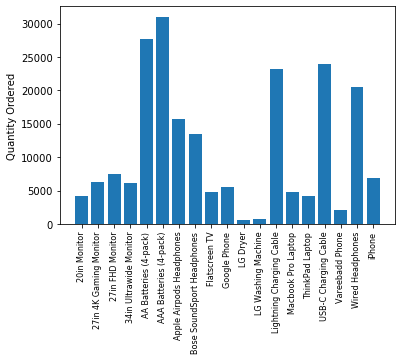

In [50]:
### What product sold most?

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation = 'vertical', size = 8)

plt.show()


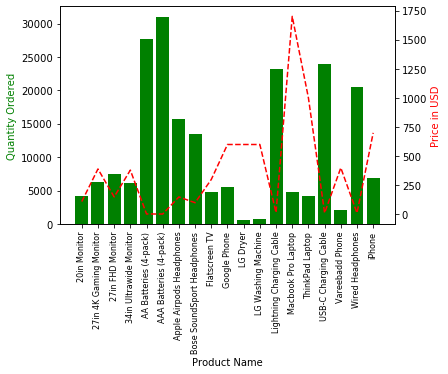

In [69]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'r--')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')

ax2.set_ylabel('Price in USD',color = 'r')

ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()
